## 1.- inspección

In [96]:
import pandas as pd

file_path = 'vehicles_us.csv'
df = pd.read_csv(file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [97]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


__Resumen inicial__

Número de Entradas y Columnas: El conjunto de datos tiene 51,525 entradas y 13 columnas.

Columnas:

- price: Precio del vehículo (entero).
- model_year: Año del modelo del vehículo (flotante).
- model: Modelo del vehículo (texto).
- condition: Condición del vehículo (texto).
- cylinders: Número de cilindros del vehículo (flotante).
- fuel: Tipo de combustible (texto).
- odometer: Kilometraje del vehículo (flotante).
- transmission: Tipo de transmisión (texto).
- type: Tipo de vehículo (texto).
- paint_color: Color del vehículo (texto).
- is_4wd: Si el vehículo tiene tracción en las cuatro ruedas (1) o no (0) (flotante).
- date_posted: Fecha en que se publicó el anuncio (texto).
- days_listed: Días que el anuncio estuvo activo (entero).
- Datos Faltantes: Algunas columnas como model_year, cylinders, odometer, paint_color, y is_4wd tienen valores nulos.


__Tipos de Datos__
Las columnas tienen diversos tipos de datos, incluyendo números enteros (int64), números con decimales (float64) y texto (object).

__Valores Faltantes__
- model_year: 3,619 valores faltantes.
- cylinders: 5,260 valores faltantes.
- odometer: 7,892 valores faltantes.
- paint_color: 9,267 valores faltantes.
- is_4wd: 25,953 valores faltantes, pero en este caso, NaN podría indicar simplemente que el vehículo no tiene tracción en las cuatro ruedas.

### Histograma

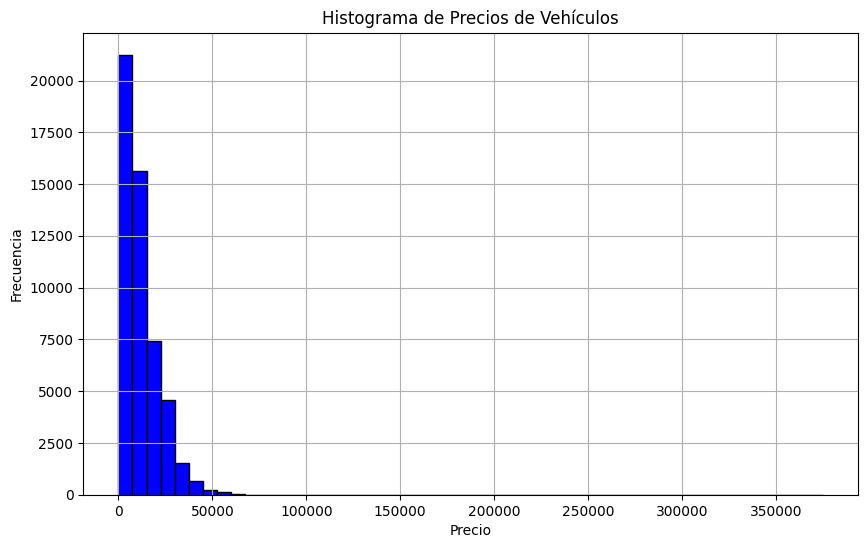

In [98]:
import matplotlib.pyplot as plt

# Plotting a histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Histograma de Precios de Vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


He ajustado el histograma para que el eje X refleje mejor la distribución de los precios, utilizando los percentiles 1 y 99 para definir los límites. Esto ayuda a visualizar más claramente la mayoría de los datos, excluyendo los valores extremos que pueden distorsionar la visualización

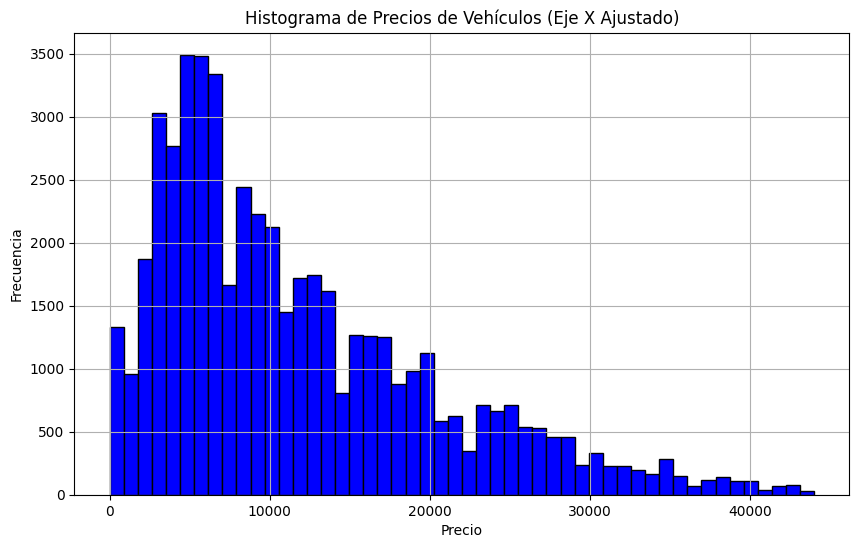

In [99]:

# Ajustando el histograma para representar mejor los datos en el eje x.
# Estableciendo un rango razonable para el eje x para visualizar mejor la distribución.
# Usaremos los percentiles 1 y 99 para evitar que los valores atípicos extremos afecten la escala.

price_1st_percentile = df['price'].quantile(0.01)
price_99th_percentile = df['price'].quantile(0.99)

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, range=(price_1st_percentile, price_99th_percentile), color='blue', edgecolor='black')
plt.title('Histograma de Precios de Vehículos (Eje X Ajustado)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [100]:
import pandas as pd
import plotly.express as px

car_data = pd.read_csv('vehicles_us.csv') # leer los datos
fig = px.histogram(car_data, x="odometer") # crear un histograma
fig.show() # crear gráfico de dispersión

# Dispersión:

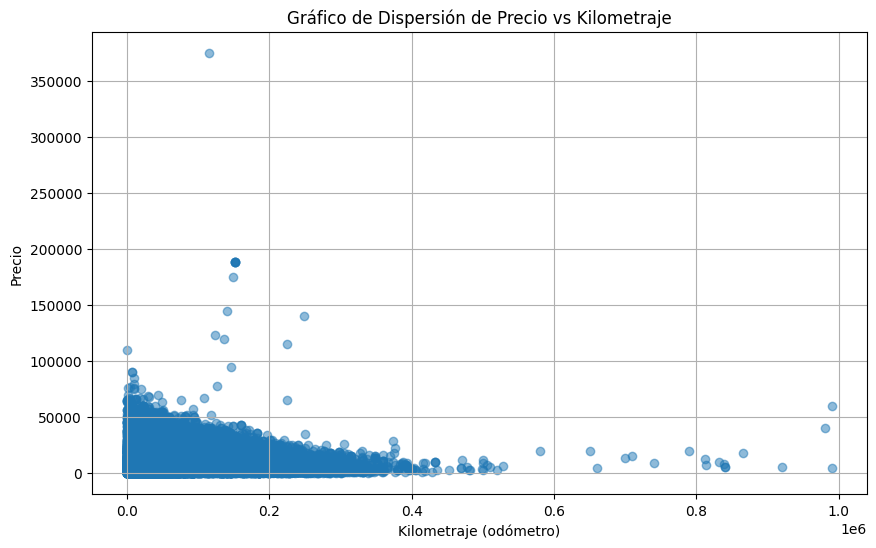

In [101]:
# Crear un gráfico de dispersión para visualizar la relación entre 'odómetro' (kilometraje) y 'precio'
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.5)
plt.title('Gráfico de Dispersión de Precio vs Kilometraje')
plt.xlabel('Kilometraje (odómetro)')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


Gráfico de dispersión que muestra la relación entre el kilometraje (medido por el odómetro) y el precio de los vehículos. En este gráfico:

Cada punto representa un vehículo.
El eje horizontal (X) muestra el kilometraje del vehículo.
El eje vertical (Y) muestra el precio del vehículo.
Este tipo de gráfico es útil para identificar patrones o tendencias entre dos variables. Por ejemplo,  investigar si los vehículos con menor kilometraje tienden a tener precios más altos, lo cual sería una tendencia esperada

# MEJORA

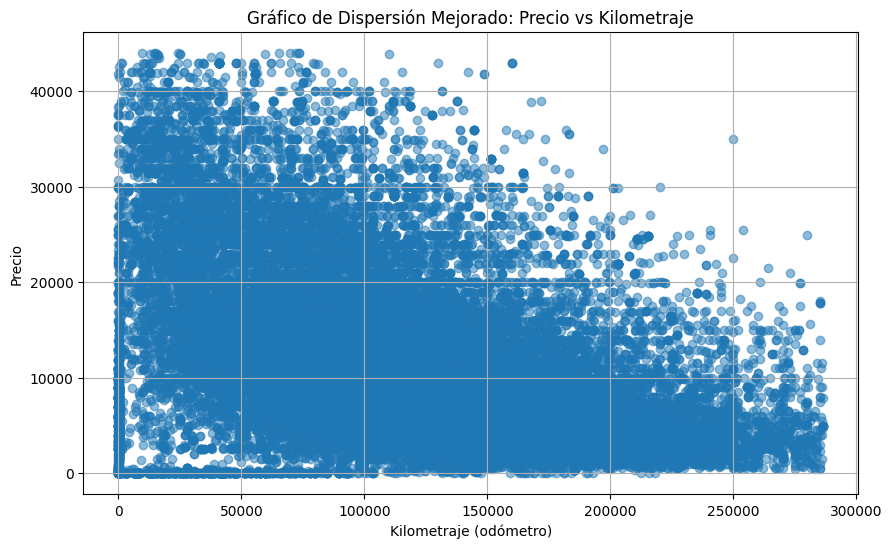

In [102]:
# Mejorando el gráfico de dispersión al manejar los valores atípicos y mejorar la legibilidad

# Eliminando valores atípicos extremos para una mejor visualización
# Utilizamos los percentiles 99 tanto para el precio como para el odómetro
price_99th = df['price'].quantile(0.99)
odometer_99th = df['odometer'].quantile(0.99)

# Filtrando el dataframe para excluir estos valores atípicos
filtered_df = df[(df['price'] <= price_99th) & (df['odometer'] <= odometer_99th)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['odometer'], filtered_df['price'], alpha=0.5)
plt.title('Gráfico de Dispersión Mejorado: Precio vs Kilometraje')
plt.xlabel('Kilometraje (odómetro)')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


En este gráfico mejorado, los valores atípicos extremos han sido eliminados, lo que proporciona una visualización más clara de la relación entre el kilometraje y el precio de los vehículos.

## 3.- gráfico de dispersión

In [106]:
import pandas as pd
import plotly.express as px

car_data = pd.read_csv('vehicles_us.csv') # leer los datos
fig = px.scatter(car_data, x="odometer", y="price") # crear un gráfico de dispersiónfig.show() # crear gráfico de dispersión

### prueba

In [107]:
datos = pd.DataFrame({"manzanas":[3,2], "perras":[1,4]}, index=["A", "B"])
                      
datos

,manzanas,perras
A,3,1
B,2,4


# otros analisis del dF

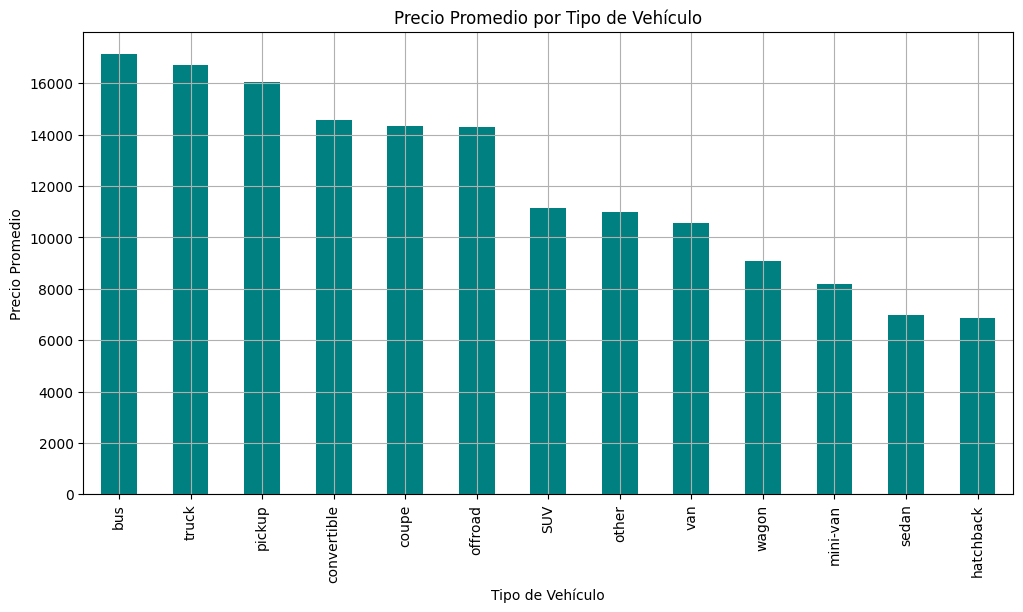

type
bus            17135.666667
truck          16734.894924
pickup         16057.410418
convertible    14575.881166
coupe          14353.442901
offroad        14292.294393
SUV            11149.400000
other          10989.714844
van            10546.941548
wagon           9088.134328
mini-van        8193.177433
sedan           6965.358647
hatchback       6868.513849
Name: price, dtype: float64

In [108]:
# Realizando un análisis por tipo de vehículo para comparar precios promedio
# Seleccionaremos la columna 'type' y 'price' para este análisis

# Agrupando los datos por 'type' y calculando el precio promedio
average_price_by_type = df.groupby('type')['price'].mean().sort_values(ascending=False)

# Creando un gráfico de barras para visualizar los precios promedio por tipo de vehículo
plt.figure(figsize=(12, 6))
average_price_by_type.plot(kind='bar', color='teal')
plt.title('Precio Promedio por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

average_price_by_type



He realizado un análisis para comparar los precios promedio de los vehículos según su tipo. El gráfico de barras muestra los precios promedio para cada tipo de vehículo en tu conjunto de datos. Además, aquí tienes los valores numéricos del precio promedio por tipo de vehículo:

Bus: $17,135.67
Truck (Camión): $16,734.89
Pickup: $16,057.41
Convertible: $14,575.88
Coupe: $14,353.44
Offroad: $14,292.29
SUV: $11,149.40
Other (Otro): $10,989.71
Van: $10,546.94
Wagon: $9,088.13
Mini-van: $8,193.18
Sedan: $6,965.36
Hatchback: $6,868.51
Este análisis muestra que los buses, camiones y pickups tienden a tener los precios promedio más altos, mientras que los sedanes y hatchbacks tienen los precios promedio más bajos. Esto puede reflejar diferencias en el uso, tamaño, o características de lujo entre los diferentes tipos de vehículos.